# Loan Defaulters



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
data  = pd.read_csv('loan.csv')
data.head().T

,0,1,2,3,4
customer.id,LA001,LA002,LA003,LA004,LA005
credit.policy,Yes,Yes,Yes,Yes,Yes
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card
int.rate,11.89%,10.71%,13.57%,10.08%,14.26%
installment,829.1,228.22,366.86,162.34,102.92
log.annual.inc,11.3504,11.0821,10.3735,11.3504,11.2997
dti,19.48,14.29,11.63,8.1,14.97
fico,737,707,682,712,667
days.with.cr.line,5639.96,2760,4710,2699.96,4066
revol.bal,28854,33623,3511,33667,4740


In [5]:
data.describe()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000
mean,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,0.062122
std,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,0.262126
min,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000
50%,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,0.000000
75%,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,0.000000
max,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        9578 non-null   object 
 1   credit.policy      9578 non-null   object 
 2   purpose            9578 non-null   object 
 3   int.rate           9578 non-null   object 
 4   installment        9578 non-null   float64
 5   log.annual.inc     9578 non-null   float64
 6   dti                9578 non-null   float64
 7   fico               9578 non-null   int64  
 8   days.with.cr.line  9578 non-null   float64
 9   revol.bal          9578 non-null   int64  
 10  revol.util         9578 non-null   float64
 11  pub.rec            9578 non-null   int64  
 12  inq.last.6mths     9578 non-null   object 
 13  delinq.2yrs        9578 non-null   object 
 14  paid.back.loan     9578 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 1.1+ MB


In [7]:
data.shape

(9578, 15)

In [8]:
X = data.drop(['customer.id','paid.back.loan'], axis = 1)
y = data['paid.back.loan']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 0)
print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)

(6704, 13) (6704,)
(2874, 13) (2874,)


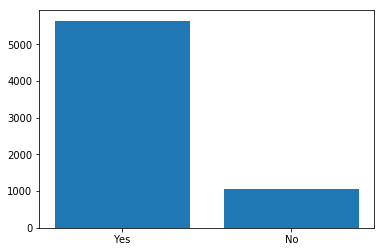

In [9]:
#Importing header files
import matplotlib.pyplot as plt


#Code starts here

#Storing value counts of target variable in 'fully_paid'
fully_paid=y_train.value_counts()

#Plotting bar plot
plt.bar(fully_paid.index, fully_paid)
plt.show()

#Code ends here

In [12]:
#Importing header files
import numpy as np
from sklearn.preprocessing import LabelEncoder


#Removing the last character from the values in column
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_train['int.rate']=X_train['int.rate'].astype(float)/100

#Removing the last character from the values in column
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_test['int.rate']=X_test['int.rate'].astype(float)/100

#Storing all the numerical type columns in 'num_df'
num_df=X_train.select_dtypes(include=['number']).copy()

#Storing all the categorical type columns in 'cat_df'
cat_df=X_train.select_dtypes(include=['object']).copy()

<Figure size 1440x1440 with 0 Axes>

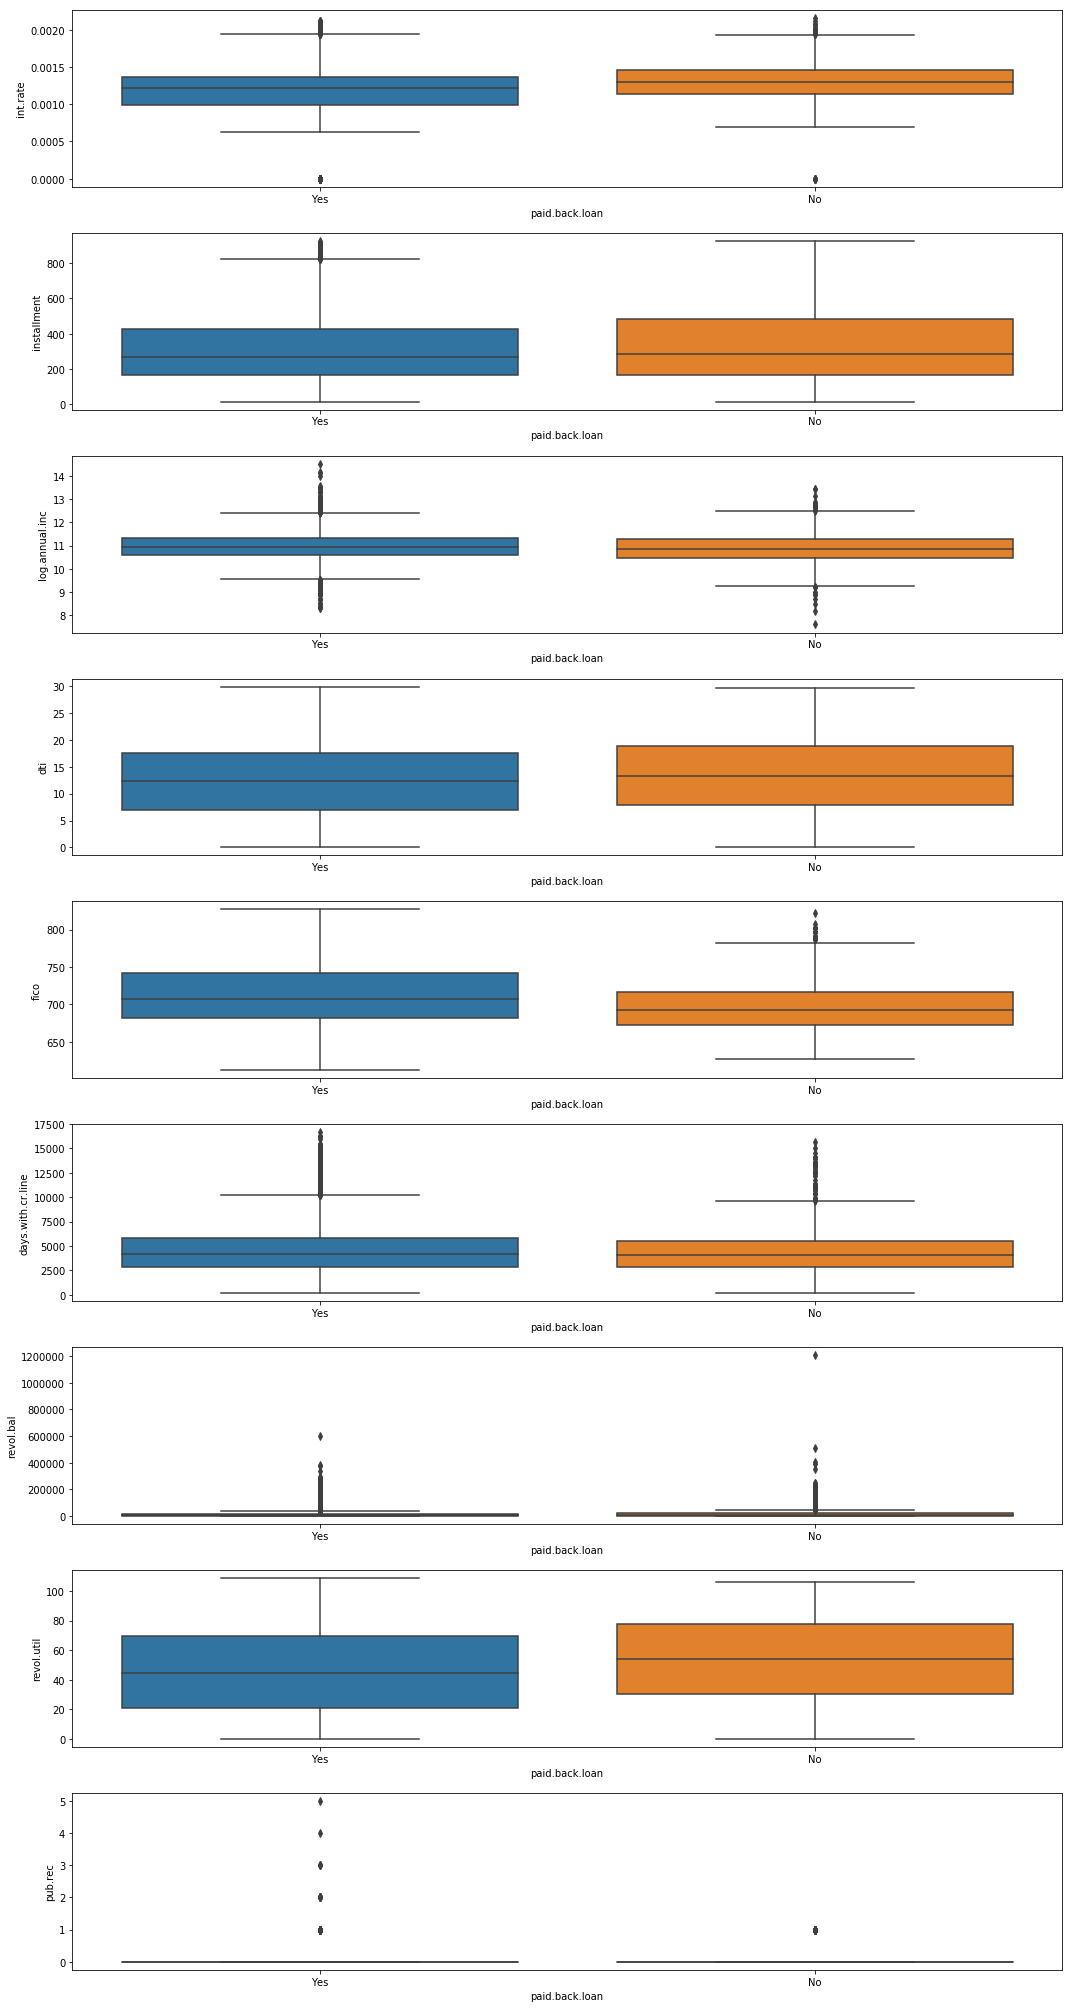

In [17]:
#Importing header files
import seaborn as sns

#Code starts here

#Setting the figure size
plt.figure(figsize=(20,20))


#Storing the columns of 'num_df'
cols=list(num_df.columns)


#Creating subplots
fig,axes=plt.subplots(9,1, figsize=(15,28))

#Looping across rows
for i in range(9):          
    
    #Plotting boxplot
    sns.boxplot(x=y_train,y=num_df[cols[i]],ax=axes[i])
    
    #Avoiding subplots overlapping
    fig.tight_layout()    

    
#Code ends here

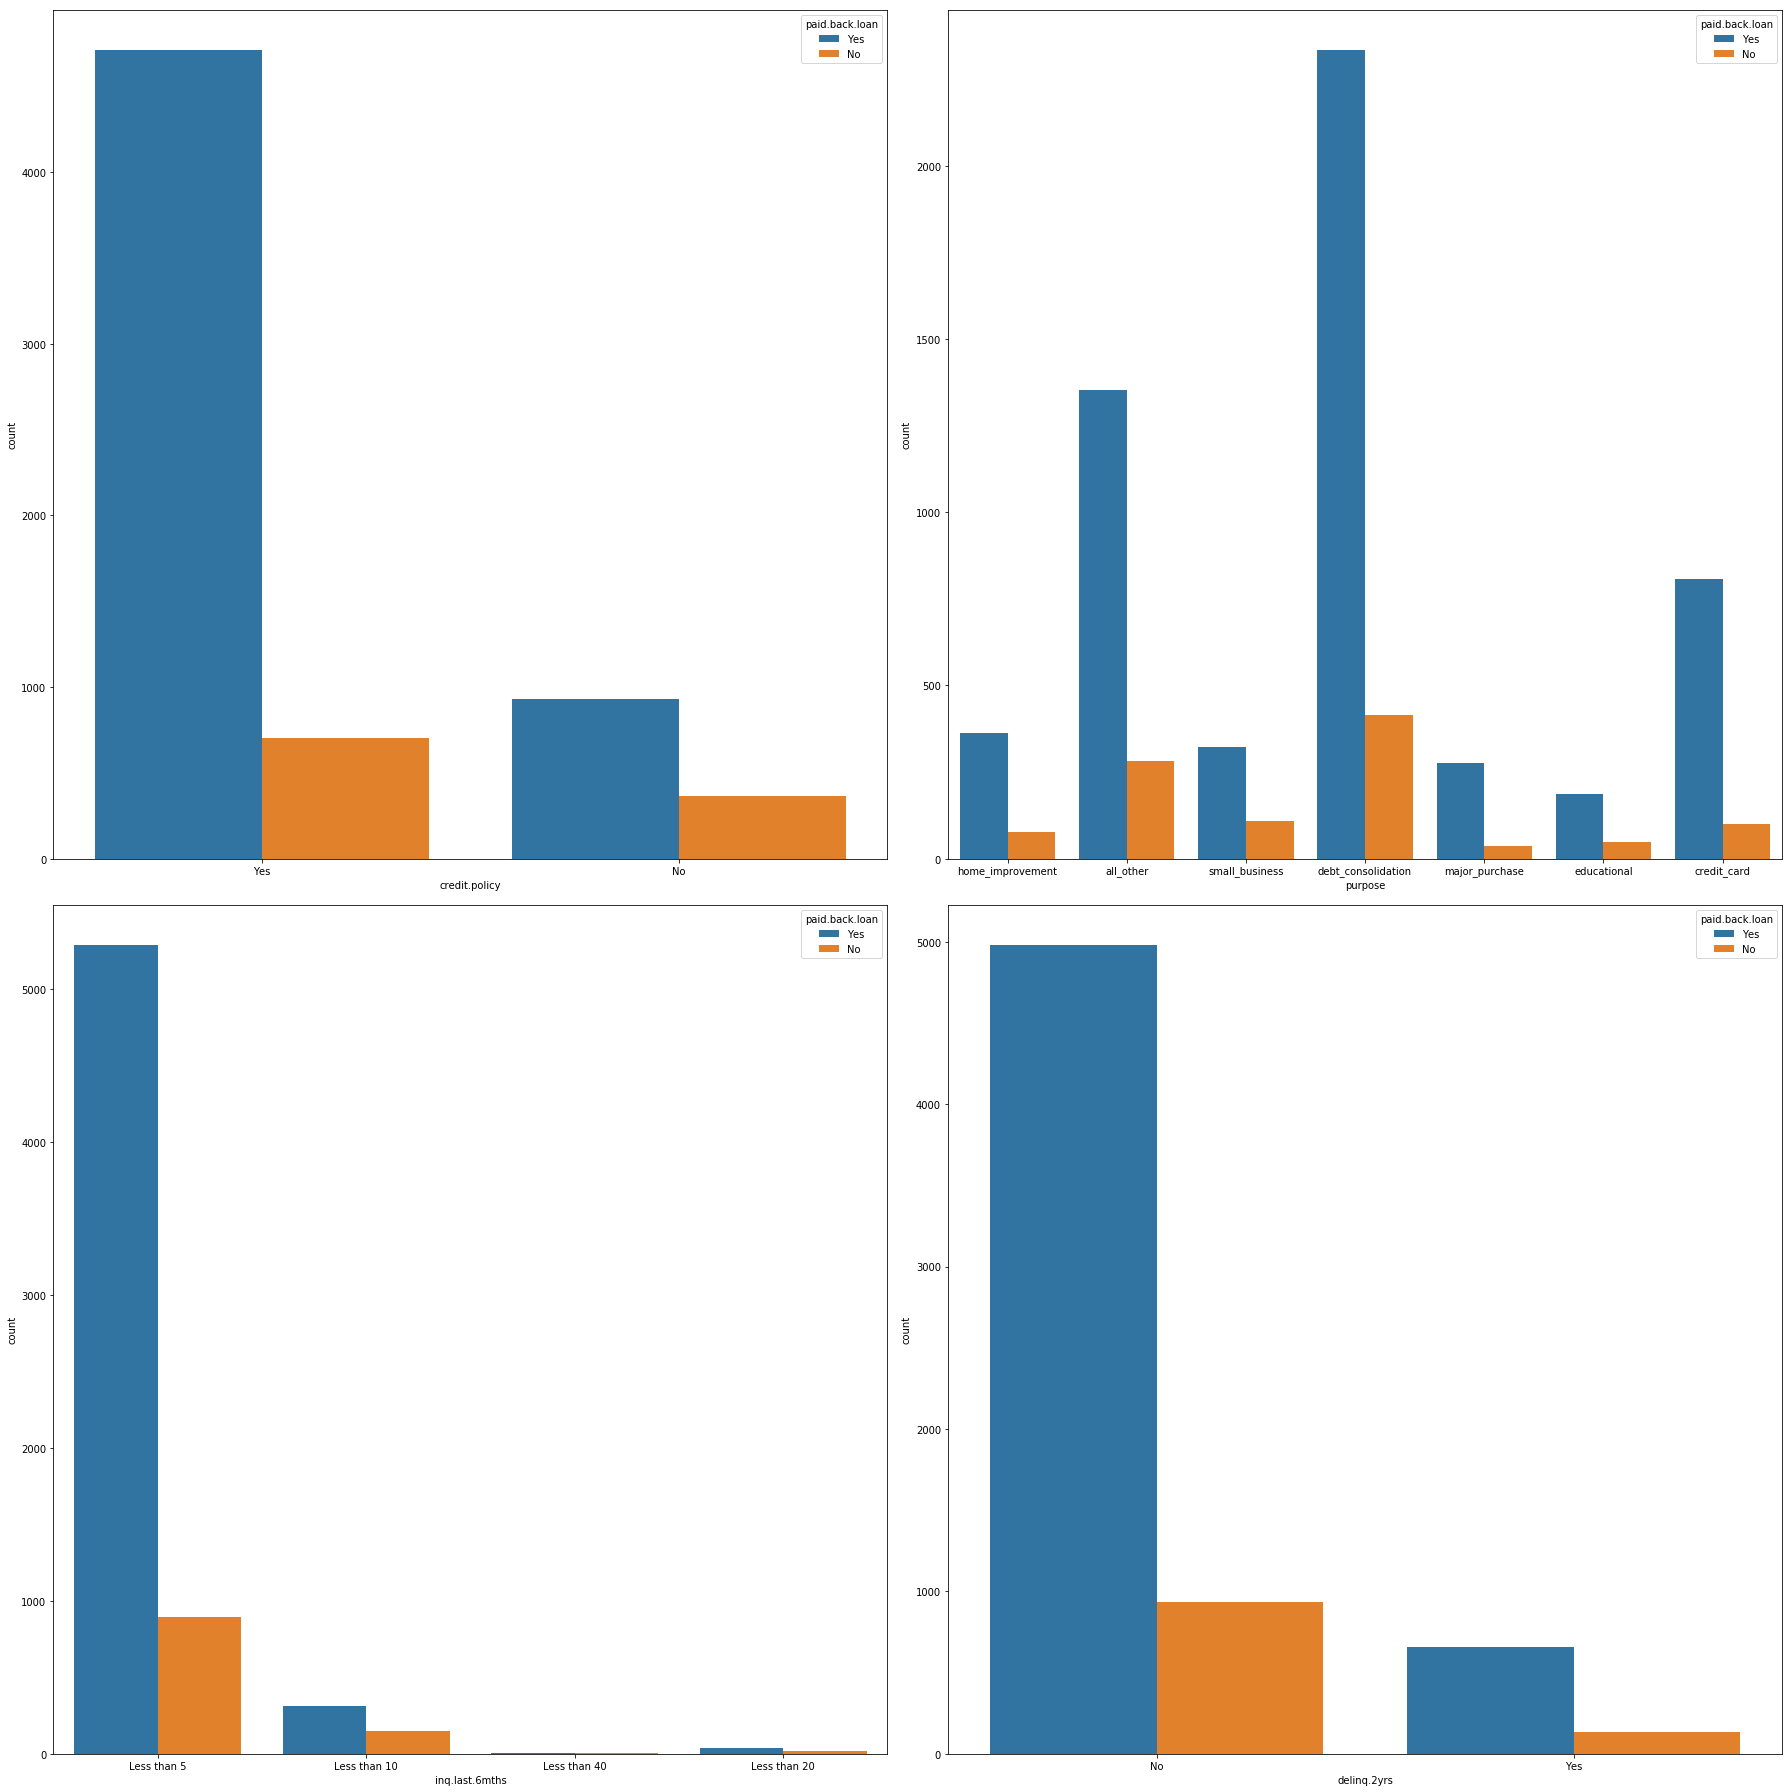

In [19]:
#Code starts here

#Storing the columns of 'cat_df'
cols=list(cat_df.columns)

#Setting up subplots
fig,axes=plt.subplots(2,2, figsize=(25,25))

#Looping through rows
for i in range(0,2):
    
    #Looping through columns
    for j in range(0,2):
        
        #Plotting count plot
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])                        
        
        #Avoiding subplots overlapping
        fig.tight_layout()    

#Code ends here

In [20]:
#Importing header files
from sklearn.tree import DecisionTreeClassifier

#Code starts here

#Looping through categorical columns
for col in cat_df.columns:
    
    #Filling null values with 'NA'
    X_train[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in X_train with 'le'
    X_train[col]=le.fit_transform(X_train[col]) 
    
    #Filling null values with 'NA'
    X_test[col].fillna('NA',inplace=True)
    
    #Fitting the column in X_test with 'le'
    X_test[col]=le.transform(X_test[col]) 

# Replacing the values of y_train
y_train.replace({'No':0,'Yes':1},inplace=True)

# Replacing the values of y_test
y_test.replace({'No':0,'Yes':1},inplace=True)

#Initialising 'Decision Tree' model    
model=DecisionTreeClassifier(random_state=0)

#Training the 'Decision Tree' model
model.fit(X_train, y_train)

#Finding the accuracy of 'Decision Tree' model
acc=model.score(X_test, y_test)

#Printing the accuracy
print(acc)

#Code ends here

0.743562978427279


In [21]:
#Importing header files
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

#Code starts here

#Initialising 'Decision Tree' model
model_2 = DecisionTreeClassifier(random_state=0)

#Applying Grid Search of hyper-parameters and finding the optimum 'Decision Tree' model
p_tree = GridSearchCV(model_2, parameter_grid, cv=5)

#Training the optimum 'Decision Tree' model
p_tree.fit(X_train, y_train)

#Finding the accuracy of the optimum 'Decision Tree' model
acc_2 = p_tree.score(X_test, y_test)

#Printing the accuracy
print(acc_2)

#Code ends here

0.837160751565762


In [26]:
# #Importing header files

# from io import StringIO
# from sklearn.tree import export_graphviz
# from sklearn import tree
# from sklearn import metrics
# from IPython.display import Image
# import pydotplus

# #Code starts here

# #Creating DOT data
# dot_data = export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None, 
#                                 feature_names=X.columns, filled = True,  
#                                 class_names=['loan_paid_back_yes','loan_paid_back_no'])

# #Drawing graph
# graph_big = pydotplus.graph_from_dot_data(dot_data)  

# #Displaying graph
# # show graph - do not delete/modify the code below this line

# img_path = ('file.png')
# graph_big.write_png(img_path)

# plt.figure(figsize=(20,15))
# plt.imshow(plt.imread(img_path))
# plt.axis('off')
# plt.show() 


# #Code ends here